---
title: Comparing predicted vs observed gene expression for rat genes selected for variation in expression across Br population, number of eQTLs, and elastic net prediction performance
date: 8/11/23
author: Sabrina Mi
---

In [7]:
import pandas as pd
import numpy as np
import kipoiseq 
from kipoiseq import Interval 
import sys
import h5py
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os

In [8]:
predictions_dir = "/home/s1mi/Br_predictions/predictions_folder/personalized_Br_selected_genes/predictions_2023-08-11/enformer_predictions"

gene_expr_bed = "/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed"
obs_gene_expr = pd.read_csv(gene_expr_bed, sep="\t", header=0, index_col='gene_id')

with open("gene_list.txt") as f:
    gene_list = f.read().splitlines()

/tmp/ipykernel_135100/534672817.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  obs_gene_expr = pd.read_csv(gene_expr_bed, sep="\t", header=0, index_col='gene_id')


### Initialize Dataframes with Observed Expression

In [15]:
pred_vs_obs = {}
for gene in gene_list:
    obs = obs_gene_expr.loc[gene][3:]
    pred_vs_obs[gene] = pd.DataFrame({"observed": obs, "predicted": np.zeros(obs.shape)})

## Quantify Gene Expression

In [21]:
annot_df = pd.read_csv("/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt", sep="\t", index_col='geneId')

for gene in gene_list:
    print(gene)
    gene_annot = annot_df.loc[gene]
    start = gene_annot['tss'] - 57344
    end = gene_annot['tss'] + 57344
    interval = f"chr{gene_annot['chromosome']}_{start}_{end}"
    for individual in pred_vs_obs[gene].index:
        haplo1 = h5py.File(f"{predictions_dir}/{individual}/haplotype1/{interval}_predictions.h5", "r")
        haplo2 = h5py.File(f"{predictions_dir}/{individual}/haplotype2/{interval}_predictions.h5", "r")
        predictions = (haplo1[interval][()] + haplo2[interval][()]) / 2
        pred_expr = np.average(predictions[[447,448], 4980])
        print(predictions[446:450, 4980])
        pred_vs_obs[gene].loc[individual, "predicted"] = pred_expr
    break


/tmp/ipykernel_135100/1897498957.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv("/home/s1mi/enformer_rat_data/rn7.gene.txt", sep="\t", index_col='geneId')


ENSRNOG00000054549
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.609986   7.9004626  0.16972242]
[0.17597985 9.6

In [11]:
def plot_predicted_vs_observed(gene):
    df = pred_vs_obs[gene]

    x = df['observed']
    y = df['predicted']
    # Create the dot plot
    plt.scatter(x, y, color='blue', marker='o', s=100)

    # Add labels and title
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title('Enformed Predicted vs Observed Gene Expression')

    # Show the plot
    plt.show()

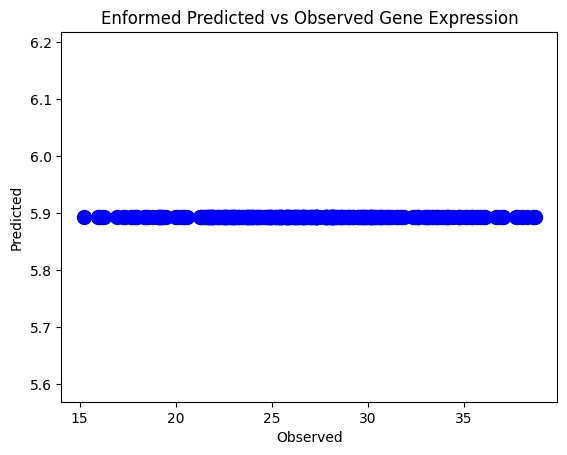

In [22]:
for gene in gene_list:
    plot_predicted_vs_observed(gene)
    break